## Motor Trend Car Road Tests Data Description:
The data was extracted from the 1974 Motor
Trend US magazine, and comprises fuel consumption and 10 aspects of automobile design and
performance for 32 automobiles (1973–74 models).
A data frame with 32 observations on 11 (numeric) variables.

#### Questions:
######   i. Identify the qualitative and quantitative variables.
######   ii. Give the appropriate graphical representation for qualitative variables. Comment the graphs.
######   iii. Give a histogram for the variable ‘mpg (Miles/(US) gallon)’ and comment the plot.
######   iv. Give stem-leaf-plot for all numerical variables and comment the plots.
######   v. Find the boxplot for the variable ‘wt(Weight (1000 lbs))’. Do you identify outliers from this data? If so, how will you interpret those car models?
######   vi. Which car models have less ‘mpg’ than the first quarter in terms of less ‘mpg’ . Also, find car models that have more ‘mpg’ than the third quarter. 

### I'm using Pandas for working with the csv file
### For plotting I'm using Matplotlib
### For Stem and Leaf plot I'm using Steamgraphic package

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# reading the csv file and saving as a Pandas DataFrame
df = pd.read_csv('mtcars.csv')

# renaming the first column which contains the car models
# it currently has no name
df.rename(columns={'Unnamed: 0': 'Car Models'}, inplace=True)

### This is what the data set looks like-

In [3]:

df


,Car Models,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


### Answaring Question i
#### Identify the qualitative and quantitative variables
* <strong>Qualitative</strong> variables are the <strong>vs</strong> which represents <strong>Engine (0 = V-shaped, 1 = straight)</strong> and <strong>am</strong> which represents <strong>Transmission(0 = automatic, 1 = manual)</strong>
* The rest of the variables are <strong>Quantative</strong>, as they are measured characteristics

In [4]:
# insted of 0 and 1 I'm inserting V-shaped and Straight 
engine_shape = pd.Series(['Straight' if el == 1 else 'V-shaped' for el in df['vs']])
df['vs'] = engine_shape



### Answaring Question ii
#### Give the appropriate graphical representation for qualitative variables. Comment the graphs
As Bar Plot and Pie Plot is suitable for representing categorical data, I'm plotting frequescy in bar plot and relative frequency in Pie plot for clear visualization

V-shaped    18
Straight    14
Name: vs, dtype: int64

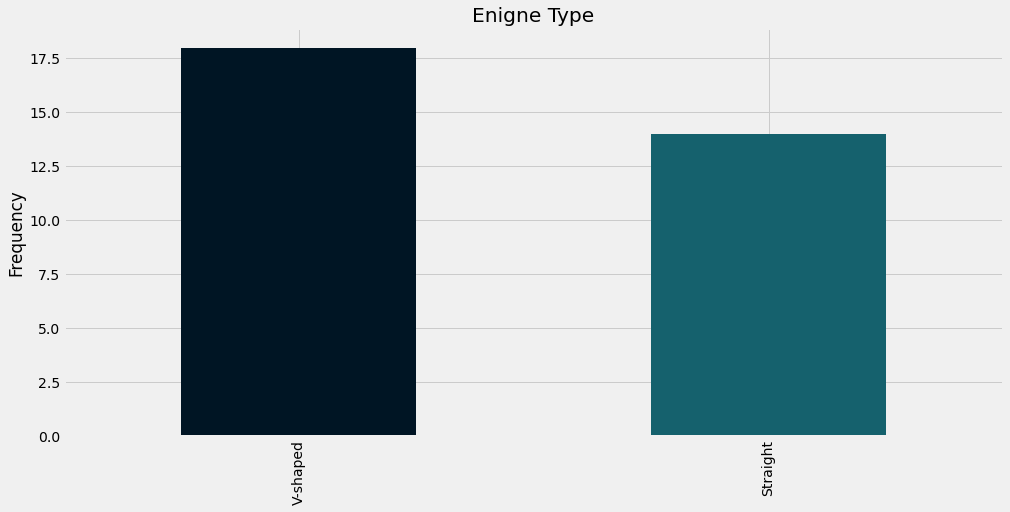

In [31]:
%matplotlib inline

# ploting bar plot for the frequecy of Engine Shape
# x-axis -> Engine shape
# y-axis -> Frequency of each type

plt.style.use('fivethirtyeight')
df['vs'].value_counts().plot.bar(color=['#001524', '#15616d'], figsize=(15,7))
plt.title("Enigne Type")
plt.ylabel("Frequency")
df['vs'].value_counts()

* Above figure showing the frequency bar plot of different Engine Type
* V-shaped engine is ahead in the race
* We have 18 V-shaped engine and 14 Straight engine in our DataSet 

V-shaped    0.5625
Straight    0.4375
Name: vs, dtype: float64

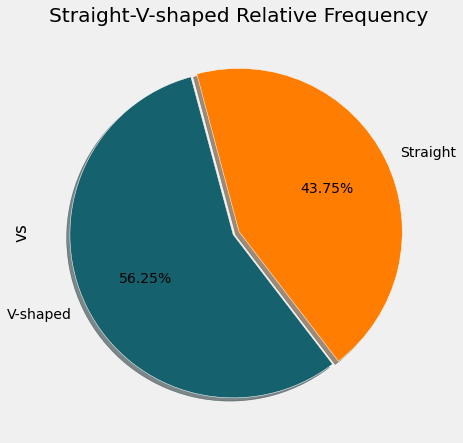

In [32]:
# ploting relative frequency

(df['vs'].value_counts()/len(df)).plot.pie(autopct='%1.2f%%',startangle=105, figsize=(15,7), colors=['#15616d','#ff7d00'], wedgeprops={'edgecolor':'white'}, explode=[0.04, 0], shadow=True)
plt.title("Straight-V-shaped Relative Frequency")
df['vs'].value_counts()/len(df)


* From the above pie plot which shows relative frequency, V-shaped engines are used just over 50%. Although not dominating.

In [33]:
# insted of 0 and 1 I'm inserting automatic and manual 
transmission = pd.Series(['manual' if el == 1 else 'automatic' for el in df['am']])
df['am'] = transmission


automatic    19
manual       13
Name: am, dtype: int64

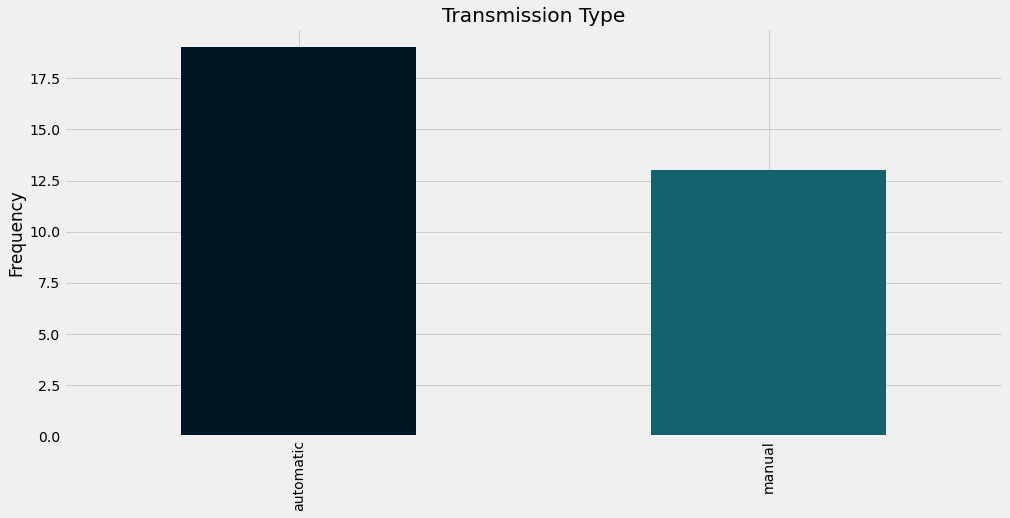

In [34]:
# ploting bar plot for the frequecy of Transmission type
# x-axis -> Transmission Type
# y-axis -> Frequency of each type

df['am'].value_counts().plot.bar(color=['#001524', '#15616d'], figsize=(15,7))
plt.title("Transmission Type")
plt.ylabel("Frequency")
df['am'].value_counts()

* In case of transmission type , Automatic transmission is more used than Manual one's
* We have 19 automatic transmission type cars , and 13 manual transmission type cars in our DataSet

automatic    0.59375
manual       0.40625
Name: am, dtype: float64

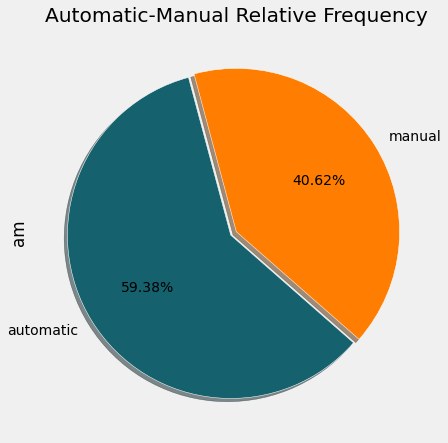

In [35]:
# ploting relative frequency
(df['am'].value_counts()/len(df)).plot.pie(autopct='%1.2f%%', 
startangle=105, figsize=(15,7), colors=['#15616d','#ff7d00'], wedgeprops={'edgecolor':'white'}, explode=[0.04, 0], shadow=True)

plt.title("Automatic-Manual Relative Frequency")
df['am'].value_counts()/len(df)

* Above figure show the relative frequency pie plot of different Transmission type.
* Automatic Transmission type is used in almost 60% of the cars. 
* There are still a little over 40% of Manual Transmission type being used

### Answaring Question iii
#### Give a histogram for the variable ‘mpg (Miles/(US) gallon)’ and comment the plot

Text(0, 0.5, 'frequency')

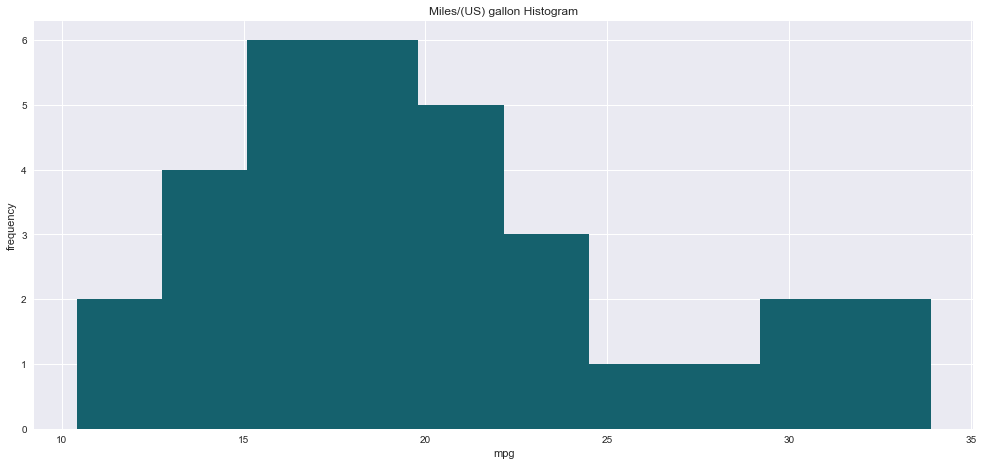

In [36]:
# ploting histogram for the column 'mpg'
plt.style.use("seaborn")
hist_plot = df['mpg'].hist(figsize=(15,7), color='#15616d')
hist_plot.set_title('Miles/(US) gallon Histogram')
hist_plot.set_xlabel('mpg')
hist_plot.set_ylabel('frequency')

* The histogram shows that the majority of the cars have a mileage between  15-20 Miles/gallon
* This is a unimodal histogram which has a hump in between 15-20
* This is not a symetrical histogram
* Has a  positively skewed tail.

### Answaring Question iv
#### Give stem-leaf-plot for all numerical variables and comment the plots

In [37]:
# staring with importing the Steamgraphic Package 
from stemgraphic import stem_graphic



#### Plotting steam and leaf plot for cyl i.e Number of cylinders


(<Figure size 540x216 with 1 Axes>, <matplotlib.axes._axes.Axes at 0xf7e26e8>)

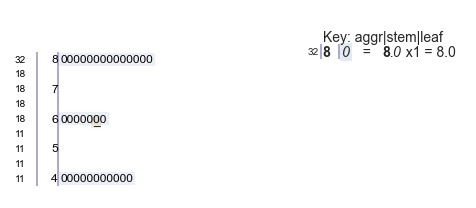

In [38]:
stem_graphic(df['cyl'], display=1200)

* There are 11 cars which has 4 cylinders.
* 7 cars has 6 cylinders
* And the majority of the cars have 8 cylinders. 14 cars listed here.
* No car uses 5 or 7 number of cylinders.

#### Plotting steam and leaf plot for mpg i.e Miles/(US)gallon

(<Figure size 540x144 with 1 Axes>, <matplotlib.axes._axes.Axes at 0x4fe4070>)

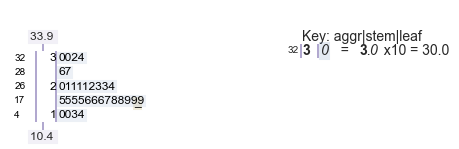

In [39]:
stem_graphic(df['mpg'], display=1200)

* Most of the cars have a mileage in range 15-19 Miles/(US) gallon
* Total of 22 cars have mileage between 15-25 Miles/(US) gallon
* Only 4 cars have a mileage above 30 mpg

#### Plotting steam and leaf plot for disp i.e Displacement (cu.in.) 

(<Figure size 540x234 with 1 Axes>, <matplotlib.axes._axes.Axes at 0x4fe2160>)

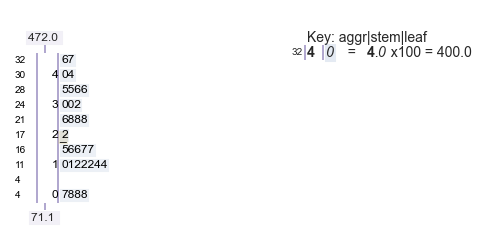

In [40]:
stem_graphic(df['disp'], display=1500)

* Majority of the cars has a displacement value in between 100-200 (cu.in.)
* 12 cars have displacement values in range 100-200 (cu.in.)
* We have 4 cars whose displacemnet is below 100 (cu.in.)
* We have 4 cars whose displacement is avobe 400 (cu.in.)
* 5 have in range 200-300 (cu.in.)
* 7 have in range 300-400 (cu.in.)

#### Plotting steam and plot for hp i.e Gross horsepower

(<Figure size 540x180 with 1 Axes>, <matplotlib.axes._axes.Axes at 0x4fe3778>)

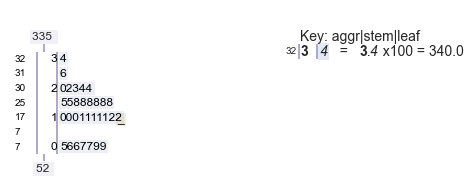

In [41]:
stem_graphic(df['hp'], display=1200)

* Majority of the cars have a gross horsepower in range of 100-200, to ve accurate there are 18 cars in this range
* Only one car has a hp above 300

#### Plotting steam and leaf plot for drat i.e Rear axle ratio 

(<Figure size 540x144 with 1 Axes>, <matplotlib.axes._axes.Axes at 0xf8c1418>)

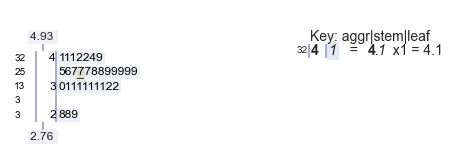

In [42]:
stem_graphic(df['drat'], display=1200)

* Most of the cars have a Rear Axle Ratio in between 3.0-3.9 (22 cars)
* 7 of the cars have a Rear axle ratio avobe 4.0


#### PLotting steam and leaf plot for wt i.e Weight (1000 lbs)


(<Figure size 540x216 with 1 Axes>, <matplotlib.axes._axes.Axes at 0xf1cfe38>)

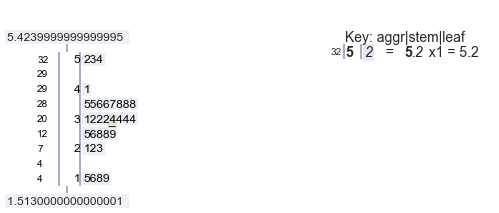

In [43]:
stem_graphic(df['wt'], display=1200)

* Most cars have a weight between 2.0-4.0 (1000 lbs) range
* 16 cars have a weight in range 3.0-3.9 (1000 lbs)

#### Plotting steam and leaf plot for qsec i.e 1/4 mile time

(<Figure size 540x216 with 1 Axes>, <matplotlib.axes._axes.Axes at 0xf9d2610>)

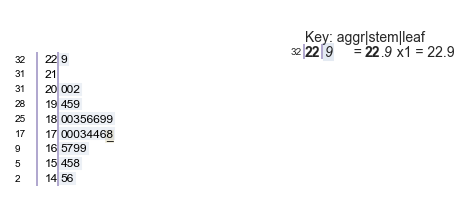

In [44]:
stem_graphic(df['qsec'], display=1500)

* qsec values are almost symetrical in stem and leaf plot here
* We have a peak at 17 and 18 stem.

#### Plotting Steam and Leaf plot for gear i.e Number of forward gears


(<Figure size 540x144 with 1 Axes>, <matplotlib.axes._axes.Axes at 0xfbd66a0>)

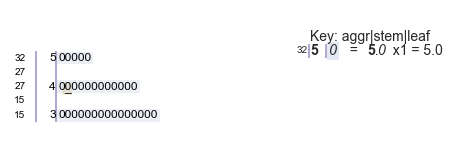

In [45]:
stem_graphic(df['gear'], display=1000)

* Majority of the cars have 3 forward gears. 15 cars to be exact.
* 12 cars have 4 forward gears
* 5 cars have 5 forward gears

#### Plotting Steam and Leaf plot for carb i.e Number of carburetors


(<Figure size 540x324 with 1 Axes>, <matplotlib.axes._axes.Axes at 0xf97e8f8>)

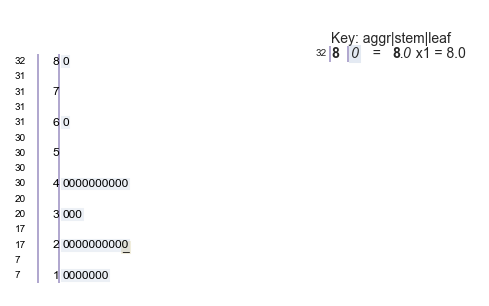

In [46]:
stem_graphic(df['carb'], display=1000)

* 4.0 and 2.0 Number of carburetors are most commonly used
* But 1.0 Number of carburetors is pretty close also. We have 7 cars with 1.0  Number of carburetors
* No car uses 5.0 and 7.0 Number of carburetors
* We have one car with 6.0 and one car with 8.0 Number of carburetors

#### Answaring Question v
##### Find the boxplot for the variable ‘wt(Weight (1000 lbs))’. Do you identify outliers from this data? If so, how will you interpret those car models?

{'whiskers': [<matplotlib.lines.Line2D at 0xfbfafe8>,
 'caps': [<matplotlib.lines.Line2D at 0xfbfa0e8>,
 'boxes': [<matplotlib.lines.Line2D at 0xfbfa5c8>],
 'medians': [<matplotlib.lines.Line2D at 0xfbfa7d8>],
 'fliers': [<matplotlib.lines.Line2D at 0xfbf5448>],
 'means': []}

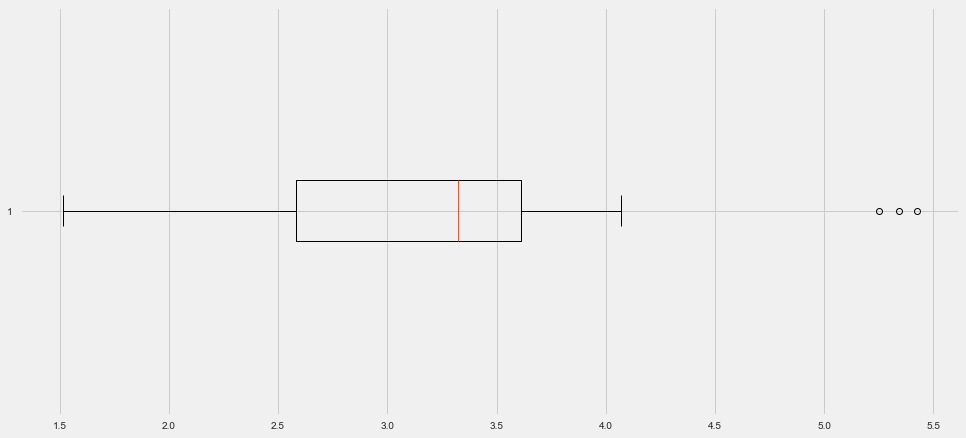

In [47]:
# ploting the Box plot for wt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,7))
plt.boxplot(df.wt, vert=False,)


In [48]:
df.wt.describe()

count    32.000000
mean      3.217250
std       0.978457
min       1.513000
25%       2.581250
50%       3.325000
75%       3.610000
max       5.424000
Name: wt, dtype: float64

* Above figure show the box plot of wt(Weight (1000 lbs))
* We have a Minimum at just above 1.5 and a Maximum at just above 4.0
* Lower Quartile is slighty above 2.5, that means we have 25% of cars which has weight less than this value.
* Upper Quatrile is just above 3.5, that means 25% of caras which has weight greater than this value.
* The red line specifies the Median. The Median is just below 3.5. And from the describe method below we can see it's exact value is 3.325.


#### We have 3 outliers. Which all are above 5.0
#### I can just look for cars which has a Weight greater than 5.0 

In [49]:
# creating a variable which will contain boolean values
# if wt > 5.0 the corresponding bool will be True, otherwise False
wt_greater_five = df.wt > 5.0

# passing the variable to our data frame 
# it'll return only those which has True in it's wt column
# taking only the Car Models column out of it
outlier_car_models = df[wt_greater_five]['Car Models']
print('Cars which has a outliered weight i.e weight greater than 5.0-')
for car in outlier_car_models:
    print(car)

Cars which has a outliered weight i.e weight greater than 5.0-
Cadillac Fleetwood
Lincoln Continental
Chrysler Imperial


#### Answaring question vi
##### Which car models have less ‘mpg’ than the first quarter in terms of less ‘mpg’ . Also, find car models that have more ‘mpg’ than the third quarter.

{'whiskers': [<matplotlib.lines.Line2D at 0xf94e520>,
 'caps': [<matplotlib.lines.Line2D at 0xf94e940>,
 'boxes': [<matplotlib.lines.Line2D at 0xf94ead8>],
 'medians': [<matplotlib.lines.Line2D at 0xf94e418>],
 'fliers': [<matplotlib.lines.Line2D at 0xf94ebf8>],
 'means': []}

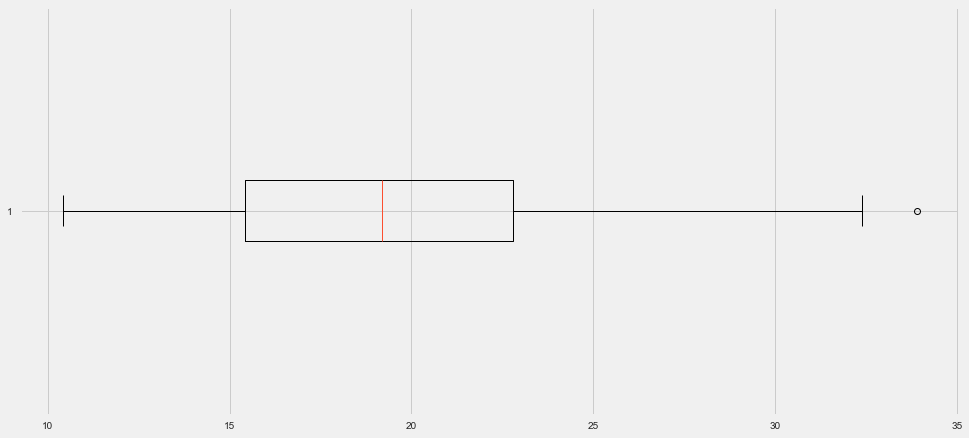

In [50]:
# ploting the Box plot for mpg
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,7))
plt.boxplot(df.mpg, vert=False,)


In [51]:
df.mpg.describe()

count    32.000000
mean     20.090625
std       6.026948
min      10.400000
25%      15.425000
50%      19.200000
75%      22.800000
max      33.900000
Name: mpg, dtype: float64

* From the box plot, the first quartile lies just above 15 and to be exact 15.425 mpg. 
* So all cars have a mpg less than 15.425 mpg has less mpg than the first quartile.
* Third quartile lies between 20 and 25 mpg, and to be exact 22.8 mpg 
* So we have to find the Car Models which have mpg greater than 22.8 mpg.

In [6]:
# like the previous case taking only those rows which has mpg < 15.4
first_q = df.mpg < 15.4
cars_less_than_first_q = df[first_q]['Car Models']
print('Car Models which have less mpg than the first Quartile-\n')
for car in cars_less_than_first_q:
    print(car)

# droping the outlier from the data set
df.drop(df[df.mpg == 33.9].index, axis=0, inplace=True)

# creating a series containing mpg > 22.8 cases
third_q =df.mpg > 22.8
cars_greater_than_third_q = df[third_q]['Car Models']
print('\n\nCar Models which have greater mpg than third Quartile- (excluding the outlier)\n')
for car in cars_greater_than_third_q:
    print(car)

Car Models which have less mpg than the first Quartile-

Duster 360
Merc 450SLC
Cadillac Fleetwood
Lincoln Continental
Chrysler Imperial
AMC Javelin
Camaro Z28
Maserati Bora


Car Models which have greater mpg than third Quartile- (excluding the outlier)

Merc 240D
Fiat 128
Honda Civic
Fiat X1-9
Porsche 914-2
Lotus Europa
